In [1]:
using Plots
using JLD2

In [2]:
d = 7

data_mwms = load("data/surface_hexagonal_mwms_$(d)_$(d)_0.596_0.607_500_3_1000320.jld2")
Krange = 1 : length(collect(values(data_mwms["p_list"]))[1])
drange = data_mwms["drange"]
σrange = data_mwms["σrange"]
p_mwms_list = data_mwms["p_list"]

data_tn = load("data/surface_hexagonal_tn_3_15_0.596_0.607_16_1023680.jld2")
p_tn_list = data_tn["p_list"] ;

linewidth=2

2

# Fig a

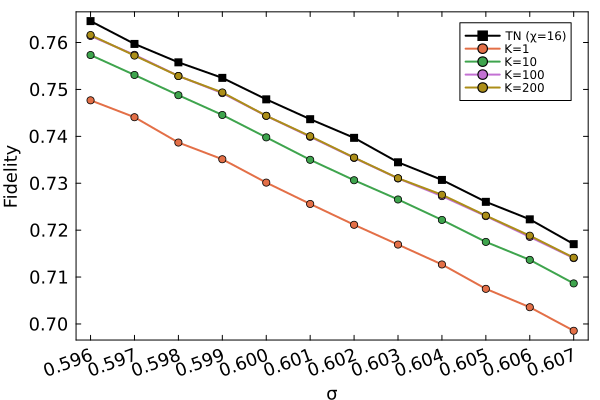

In [3]:
f_tn = [p_tn_list[[σ, d]][1] for σ in σrange]
plot(σrange, f_tn, marker=:square, label="TN (χ=16)", color=:black, linewidth=linewidth)

for k in [1, 10, 100, 200]
    f_mwms = [p_mwms_list[[σ, d]][k][1] for σ in σrange]
    label="K=$k"
    plot!(σrange, f_mwms, marker=:circle, label=label, linewidth=linewidth)
end

plot!(xlabel="σ", 
    ylabel="Fidelity", 
    xticks=round.(σrange, digits=3),
    grid=false,
    tickfontsize=12,
    labelfontsize=12,
    legenfontsize=12,
    xrotation = 20,
    frame=:box
)

In [4]:
savefig("plots/fig_surf_hex_a.pdf");

In [5]:
f_tn = [p_tn_list[[σ, d]][1] for σ in σrange]
k = 200
f_mwms = [p_mwms_list[[σ, d]][k][1] for σ in σrange]

abs.(f_tn.^2 - f_mwms.^2) ./ f_tn.^2

12-element Vector{Float64}:
 0.0077482559373138905
 0.006535566342267141
 0.007720484223078194
 0.008242359675592486
 0.009338655528893703
 0.00972559673851451
 0.011342159550765788
 0.009228152906206393
 0.008634950996172267
 0.008076612856177053
 0.009628711989490916
 0.008032665402331648

# Fig b

100 [81.24944666803906, 59.206322174609774, 27.618746329966292, 14.290224006321242]
80 [80.84401244414458, 59.48503421111352, 27.456423926547473, 13.995543210416251]
40 [79.07997766386885, 58.198510678467294, 25.505216062829987, 12.817850491428917]
20 [75.13363410979449, 52.44087464903846, 23.126232581905462, 11.080157484707225]
10 [63.8881992085514, 42.2079294346103, 18.757136021657647, 8.870721963651778]


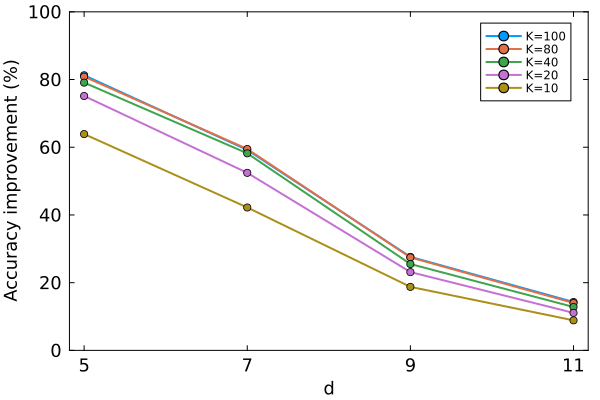

In [6]:
data_mwms_2 = load("data/surface_hexagonal_mwms_5_11_0.607_0.607_100_3_1000320.jld2")
σrange = data_mwms_2["σrange"]
drange = data_mwms_2["drange"]
p_mwms_list = data_mwms_2["p_list"]

plot()
Krange = [100, 80, 40, 20, 10]
improvements = nothing
for K in Krange
    improvements = []
    for d in drange
        f_tn = [p_tn_list[[σ, d]][1] for σ in σrange]
        f_mwms_1 = [p_mwms_list[[σ, d]][1][1] for σ in σrange]
        f_mwms = [p_mwms_list[[σ, d]][K][1] for σ in σrange]
        push!(improvements, (f_mwms.^2 - f_mwms_1.^2) ./ abs.(f_tn.^2 - f_mwms_1.^2))
    end

    println(K, " ", [item[end] for item in improvements] .* 100)
    plot!(drange, [item[end] for item in improvements] .* 100, marker=:circle, label="K=$K", linewidth=linewidth)
end

plot!(xlabel="d", 
    ylabel="Accuracy improvement (%)", 
    xticks=drange,
    grid=false,
    tickfontsize=12,
    labelfontsize=12,
    legenfontsize=12,
    ylim = [0, 100],
    # yaxis=:log
    frame=:box
)

In [7]:
savefig("plots/fig_surf_hex_b.pdf");